# Analysis of number of connections per client certificate

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import math
%matplotlib inline

In [4]:
no_v_rtts = np.loadtxt("1_connections_per_certificate.sh.csv.countonly", delimiter=",")
no_v_rtts_sort = np.sort(no_v_rtts)

ios = np.loadtxt("1_connections_per_certificate_ios.sh.csv.countonly", delimiter=",")
ios_sort = np.sort(ios)
macos = np.loadtxt("1_connections_per_certificate_macos.sh.csv.countonly", delimiter=",")
macos_sort = np.sort(macos)

# drop excessice connections from build cluster
no_v_rtts_sort = no_v_rtts_sort[no_v_rtts_sort < 1000]
ios_sort = ios_sort[ios_sort < 1000]
macos_sort = macos_sort[macos_sort < 1000]

## Plot definitions

In [5]:
ylabel = "% of certificates with $\leq$ n connections"
xlabel = "# of connections (cut at 1,000)"
xmin = 0
ymin = 0
path = "./"

## CDF: No verification RTT

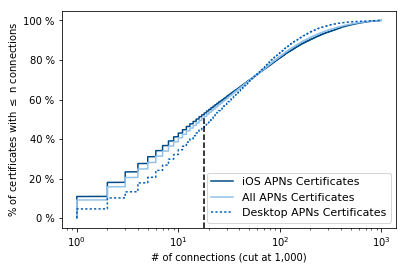

In [6]:
TUMDarkerBlue="#004b87"
TUMLighterBlue="#92c1e9"
TUMBlue="#005eb8"
TUMOrange="##e87722"

# CDF:
yvals_ios= np.arange(len(ios_sort))/float(len(ios_sort))*100
# CCDF:
#yvals = (float(len(no_v_rtts_sort))-np.arange(len(no_v_rtts_sort)))/float(len(no_v_rtts_sort))*100
plt.plot(ios_sort, yvals_ios, label="iOS APNs Certificates",color=TUMDarkerBlue,linestyle="-")#,marker='.')

# CDF:
yvals= np.arange(len(no_v_rtts_sort))/float(len(no_v_rtts_sort))*100
# CCDF:
#yvals = (float(len(no_v_rtts_sort))-np.arange(len(no_v_rtts_sort)))/float(len(no_v_rtts_sort))*100
plt.plot(no_v_rtts_sort, yvals, label="All APNs Certificates",color=TUMLighterBlue)

# CDF:
yvals_macos= np.arange(len(macos_sort))/float(len(macos_sort))*100
# CCDF:
#yvals = (float(len(no_v_rtts_sort))-np.arange(len(no_v_rtts_sort)))/float(len(no_v_rtts_sort))*100
plt.plot(macos_sort, yvals_macos, label="Desktop APNs Certificates",color=TUMBlue,linestyle=":")

plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%d %%'))
plt.xscale("log")
plt.ylabel(ylabel)
plt.xlabel(xlabel)
plt.legend(loc='lower right',prop={'size':11})
idx=28158 # value for 17 days
plt.axvline(no_v_rtts_sort[idx], ymax=idx/len(no_v_rtts_sort), linestyle='--', color='k') # vertical lines
#plt.gcf().subplots_adjust(bottom=0.125,right=0.97,left=0.1,top=0.97)
plt.savefig('connspercert.pdf', format='pdf', dpi=2000)    
plt.show()

In [7]:
%%bash
pdfcrop connspercert.pdf
rm connspercert.pdf

PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `connspercert-crop.pdf'.
